In [ ]:
import pandas as pd
from tqdm import tqdm

tqdm.pandas()

In [ ]:
BASE_PATH = "drive/MyDrive/Major Project/recipe1m"

# Tasks
- [x] Make a string containing all instructions
- [x] Remove the delim (;) used to seperate recipe steps
- [x] Fit tokenizer
- [x] Export tokenizer

In [ ]:
df_train = pd.read_csv(f'{BASE_PATH}/5_dataset_merged/train_merged.csv') 
df_test = pd.read_csv(f'{BASE_PATH}/5_dataset_merged/test_merged.csv')
df_val = pd.read_csv(f'{BASE_PATH}/5_dataset_merged/val_merged.csv')

In [ ]:
df_train.tail()

,id,title,partition,url,instructions,image_file_names,ingredients
210657,fffdaf4717,Bulgogi (Korean Beef Barbecue),train,http://www.myrecipes.com/recipe/bulgogi-korean...,wrap beef plastic wrap freeze 1 hour firm;remo...,105822b27f.jpg,brown sugar;soy sauce;garlic
210658,fffe837825,Impossible Pumpkin Pie I,train,http://allrecipes.com/recipe/impossible-pumpki...,preheat oven 350 degree f 175 degree c;grease ...,7d52ad7da5.jpg;91819fb179.jpg,pumpkin puree;milk;butter;eggs;vanilla extract
210659,ffffcd4444,Extremely Easy and Quick - Namul Daikon Salad,train,https://cookpad.com/us/recipes/153324-extremel...,julienne daikon squeeze excess moisture;combin...,be3b1c7122.jpg,sesame oil;salt;soy sauce
210660,ffffd33513,Pan-Roasted Pork Chops With Apple Fritters,train,http://cooking.nytimes.com/recipes/1015164,large bowl mix apple cider 4 cup water sugar s...,15c1a2afd4.jpg,apple cider;sugar;pork chops;shallots;thyme
210661,ffffd533d7,Polpette in Spicy Tomato Sauce,train,http://www.foodandwine.com/recipes/polpette-sp...,preheat oven 350;bowl mix veal sausage meat br...,f2b6617941.jpg,ground veal;sausage;breadcrumbs;milk;garlic


In [ ]:
df_test.tail()

,id,title,partition,url,instructions,image_file_names,ingredients
6715,ffc014706a,Jamaican Spice Mixture,test,http://www.food.com/recipe/jamaican-spice-mixt...,using spice grinder blender mortar pestle grin...,29dd992351.jpg;2ce0edccd5.jpg;4909e4029a.jpg;6...,cayenne pepper;salt;sugar;ground pepper;onion;...
6716,ffc9903e3c,Mom's Tuna Macaroni Salad,test,https://cookpad.com/us/recipes/357294-moms-tun...,cook macaroni according packag drain large bow...,8aeac7f56c.jpg,eggs;mayonnaise;olive oil;onions;paprika
6717,ffd09575a0,Strawberry Sauce,test,http://www.delish.com/recipefinder/strawberry-...,blend 1 pound strawberry hulled 1 4 cup sugar ...,2be9f74a8f.jpg,strawberries;sugar;vanilla extract
6718,ffd437c214,Horse Mackerel Kabayaki,test,https://cookpad.com/us/recipes/149472-horse-ma...,touch middle horse mackerel fillet find bone r...,951516aa01.jpg,mackerel;flour;soy sauce
6719,ffeab815e3,Pick-Up Saltfish,test,http://www.epicurious.com/recipes/food/views/p...,rinse salt cod cold water;place fish large bow...,54cb80dbbd.jpg,salt;onion;tomatoes;peppers


In [ ]:
df_val.tail()

,id,title,partition,url,instructions,image_file_names,ingredients
6866,ffa438e7bc,Cinnamon Swirl Bread That Actually Works!,val,http://www.food.com/recipe/cinnamon-swirl-brea...,mix yeast water together proof;mix together su...,015a2615ff.jpg;0402036526.jpg;184a211110.jpg;8...,yeast;milk;water;sugar;egg;butter;salt;butter;...
6867,ffb0e4cdde,Stone Fruit Patchwork Bake,val,http://cooking.nytimes.com/recipes/1012699,heat oven 400 degree butter 9 13 inch similar ...,2ce4490824.jpg,butter;salt;sugar;peaches;lemon juice
6868,ffcae7632a,Perfect Apple Crunch,val,http://tastykitchen.com/recipes/desserts/perfe...,preheat oven 375 degree f;combine peeled slice...,74bb1ecf34.jpg,apples;flour;cinnamon;brown sugar;flour;butter
6869,ffd738ff27,Cucumber Salsa,val,http://www.food.com/recipe/cucumber-salsa-20980,put chopped veggie big bowl;smaller bowl whisk...,4ae6ff48d0.jpg,cucumbers;tomatoes;sugar
6870,ffe65210ea,Super Calzone,val,http://www.food.com/recipe/super-calzone-450580,make dough;dissolve yeast warm water;let stand...,b98d892aa3.jpg;fde5f3a2d0.jpg,yeast;honey;salt;flour;pepperoni;mozzarella ch...


In [ ]:
def tag_instruction(instruction):
  split = instruction.split(';')
  split = map(lambda s: " <STEP_START> "+s+" <STEP_END> ", split)
  merged = "".join(split)
  return "<INSTRUCTION_START> " + merged + " <INSTRUCTION_END> "


def get_corpus(df: pd.DataFrame):
  instructions = df["instructions"].values
  return list(map(lambda i: tag_instruction(str(i)), instructions))

In [ ]:
corpus = get_corpus(df_train)
corpus += get_corpus(df_test)
corpus += get_corpus(df_val)

In [ ]:
len(corpus)

224253

In [ ]:
test_inst_1 = "heat 2 tablespoon oil large saucepan;stir brown rice cook golden brown;add lentil water salt bring boil;reduce heat low cover cook rice tender water absorbed 40 minute;add additional water needed mixture thick;remove heat let cool slightly;place cooked rice mixture food processor along egg bread crumb parmesan cheese basil garlic powder;process well combined texture ground meat;form 1 4 1 2 inch thick patty using 3 tablespoon mixture;heat 3 tablespoon oil large skillet;batch fry patty browned 2 3 minute per side;drain paper towel cool;fry remaining patty manner;store airtight container refrigerator freezer"
test_inst_2 = "1;mix cornstarch water slurry mix meat cornstarch slurry soy sauce sesame oil rice wine together honesty guesstimated amount mix wish;let marinate 30 minute;2;soak vermicelli warm water softened;3;meat marinating vermicelli soaking mince garlic ginger green onion also guesstimated amount;4;saute garlic ginger oil high add meat mixture green onion;cook break meat small piece spatula;meat mostly cooked add vermicelli turn heat medium low;5;stirring add small amount soaking water continuously pan keep vermicelli sticking done two minute;seasoning soy sauce chili garlic sauce taste mixing water keep sauce staying one portion noodle;6;done vermicelli tree bouncy small bit pork ant cling noodle"

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(num_words=len(set(corpus)), filters='!"#$%&()*+,-./:;=?@[\\]^`{|}~\t\n')

tokenizer.fit_on_texts(corpus)

In [ ]:
seq1 = tokenizer.texts_to_sequences([tag_instruction(test_inst_1)])
seq2 = tokenizer.texts_to_sequences([tag_instruction(test_inst_2)])

print(seq1[0])
print(tokenizer.sequences_to_texts(seq1))

[7, 1, 6, 10, 78, 21, 24, 100, 2, 1, 12, 55, 125, 14, 109, 55, 2, 1, 4, 784, 22, 16, 76, 60, 2, 1, 140, 6, 79, 44, 14, 125, 108, 22, 624, 303, 3, 2, 1, 4, 345, 22, 364, 13, 176, 2, 1, 31, 6, 56, 42, 157, 2, 1, 18, 126, 125, 13, 194, 234, 482, 28, 111, 217, 288, 37, 341, 63, 101, 2, 1, 382, 38, 183, 792, 247, 124, 2, 1, 164, 5, 34, 5, 10, 53, 176, 429, 92, 30, 78, 13, 2, 1, 6, 30, 78, 21, 24, 62, 2, 1, 410, 155, 429, 144, 10, 30, 3, 401, 51, 2, 1, 94, 117, 228, 42, 2, 1, 155, 57, 429, 1913, 2, 1, 358, 630, 318, 290, 505, 2, 8]
['<instruction_start> <step_start> heat 2 tablespoon oil large saucepan <step_end> <step_start> stir brown rice cook golden brown <step_end> <step_start> add lentil water salt bring boil <step_end> <step_start> reduce heat low cover cook rice tender water absorbed 40 minute <step_end> <step_start> add additional water needed mixture thick <step_end> <step_start> remove heat let cool slightly <step_end> <step_start> place cooked rice mixture food processor along eg

In [ ]:
import pickle

with open(f"{BASE_PATH}/tokenizer.pkl", "wb") as buffer:
  pickle.dump(tokenizer, buffer, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
words = " ".join([k for k in tokenizer.word_counts.keys()])

wordcloud = WordCloud(width = 5000,
                      height= 4000,
                      background_color="black").generate(words)

KeyboardInterrupt: ignored

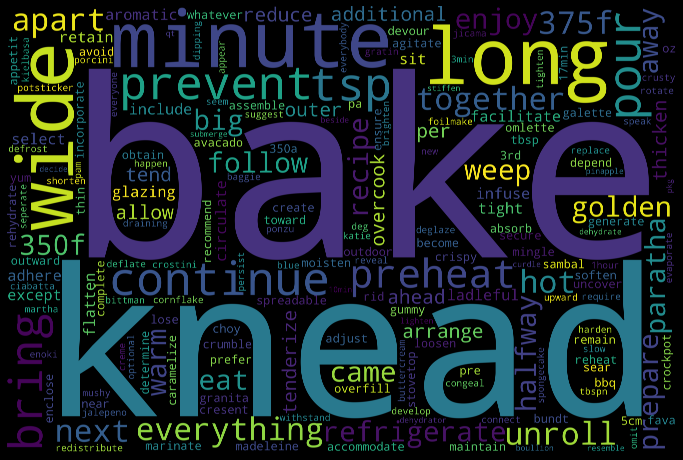

In [ ]:
plt.figure(figsize=(12, 12), facecolor="k", edgecolor="k")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()